# <span style=color:red>Notebook</span>
- Numpy
- mayplotlib
- pendu
- Pierre-feuille-ciseaux
- Mini-jeu de devinettes
- Création d'un jeu de Morpion
- pandas basic
- seaborne
---

Import Bibloteque

In [56]:
import os
import time

import seaborn as sns
import random
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import clear_output

# <span style=color:red>Numpy</span>
---
## Exercices:

1. Créez un tableau NumPy contenant les entiers de 1 à 10 (inclus).

In [2]:
# créer un tableau
t_1 = np.arange(1, 11)

2. Créez un tableau NumPy contenant 5 valeurs flottantes générées aléatoirement entre 0 et 1.


In [3]:
# créer un tableau
t_2 = np.linspace(0, 1, 5)


3. Créez une fonction qui prend un tableau NumPy en entrée et renvoie la somme de ses éléments.

In [4]:
# function
def func_sum(tabl:np.ndarray)->float:
    sum_elem = 0.0
    for i in tabl:
        sum_elem += i
    return sum_elem

In [5]:
# verification
func_sum(t_1), np.sum(t_1)

(np.float64(55.0), np.int64(55))

4. Créez une fonction qui prend deux tableaux NumPy en entrée et renvoie le produit scalaire de ces deux tableaux (dot product).

In [6]:
# function
def dot_prod(t_1:np.ndarray, t_2:np.ndarray)->np.ndarray:
    prod_dot_elem = 0.0
    for i in range(t_1.shape[0]):
        prod_dot_elem = t_1[i] * t_2[i] 
    return np.dot(t_1, t_2)



In [7]:
# créer un tableau pour tester
t_2 = np.random.randint(1, 10, size=t_1.shape[0])
# verification
np.dot(t_1, t_2),  dot_prod(t_1, t_2)

(np.int64(325), np.int64(325))

5. Créez une fonction qui prend un tableau NumPy en entrée et renvoie un nouveau tableau contenant uniquement les éléments uniques du tableau d'origine.

In [8]:
# function
def uniq_val(tabl:np.ndarray)->np.ndarray:
    return np.array(set(tabl.tolist()))

In [9]:
# créer un tableau pour tester
tabl_test = np.array([0, 2, 5, 0.5, 6, 13, 1, 0.5])
# verification
uniq_val(tabl_test), np.unique(tabl_test)

(array({0.0, 0.5, 2.0, 1.0, 5.0, 6.0, 13.0}, dtype=object),
 array([ 0. ,  0.5,  1. ,  2. ,  5. ,  6. , 13. ]))

6. Créez une fonction qui prend un tableau NumPy en entrée et renvoie un nouveau tableau contenant les éléments triés par ordre croissant.

In [10]:
# function
def tri(t:np.ndarray)->np.ndarray:
    for i in range(t.shape[0] - 1):
        for j in range(t.shape[0] - 1):
            if t[i] > t[j]:
                t[i] , t[2] = t[2], t[1]
    return t


In [11]:
# verification
tri(tabl_test) , np.sort(tabl_test) 

(array([0. , 2. , 2. , 2. , 2. , 2. , 2. , 0.5]),
 array([0. , 0.5, 2. , 2. , 2. , 2. , 2. , 2. ]))

7. Créez une fonction qui prend un tableau NumPy en entrée et renvoie la moyenne, la médiane et l'écart type de ses éléments.


In [12]:
# function
def stat(t:np.ndarray)->tuple:
    mean = np.sum(t) / t.shape[0]
    if t.shape[0] % 2 == 1:
        mediane = np.sort(t)[(t.shape[0] // 2)]
    else:
        mediane = (np.sort(t)[t.shape[0] // 2] + np.sort(t)[(t.shape[0] // 2) - 1]) / 2
    sum_cum = 0
    for i in t:
        sum_cum += (i - mean) ** 2
    std = np.sqrt(sum_cum / t.shape[0])
    return mean, mediane, std

In [13]:
# verification
print(np.mean(tabl_test), np.median(tabl_test), np.std(tabl_test))
stat(tabl_test)

1.5625 2.0 0.7680128579652817


(np.float64(1.5625), np.float64(2.0), np.float64(0.7680128579652817))

8. Créez une fonction qui prend un tableau NumPy en entrée et renvoie un nouveau tableau où tous les éléments inférieurs à 5 sont remplacés par 0 et tous les éléments supérieurs ou égaux à 5 sont remplacés par 1.

In [14]:
# function
def limit(t:np.ndarray)->np.ndarray:
    mask = t <=5
    a = np.arange((t.shape[0])) # pour ne change pas le t
    a[t > 5] = 1
    a[mask] = 0
    return a

In [15]:
# verification
limit(tabl_test)

array([0, 0, 0, 0, 0, 0, 0, 0])

9. Créez une fonction qui prend un tableau NumPy de nombres entiers en entrée et renvoie un nouveau tableau contenant uniquement les nombres premiers du tableau d'origine.

In [16]:
# function
def premiers(t:np.ndarray)->np.ndarray:
    def check(n:int)->bool:
        if n < 2:
            return False
        for i in range(2, int(n ** 0.5) + 1):
            if n % i == 0:
                return False
        return True
    mask = np.array([check(n) for n in t])
    return t[mask]

In [17]:
# verification
premiers(tabl_test)

array([2., 2., 2., 2., 2., 2.])


10. Créez un tableau NumPy 2D de taille 3x3 contenant des valeurs entières générées aléatoirement entre 1 et 10.
    


In [18]:

# Creation de tableau
t_2d = np.arange(1, 10).reshape(3, 3)

# <span style=color:red> Pyplot</span>
---
### Exercices 


1. Tracer un graphe linéaire des points (x, y) où x = [0, 1, 2, 3, 4] et y = [1, 4, 3, 8, 5].

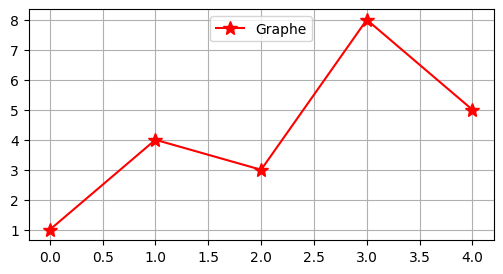

In [19]:
# 1.
x = [0, 1, 2, 3, 4]
y = [1, 4, 3, 8, 5]

fig = plt.figure(figsize=(6, 3))
plt.plot(x, y, "*-", color="r", ms=10, label="Graphe")
plt.grid()
plt.legend(loc=9)

2. Tracer un histogramme à partir de données aléatoires générées par NumPy.

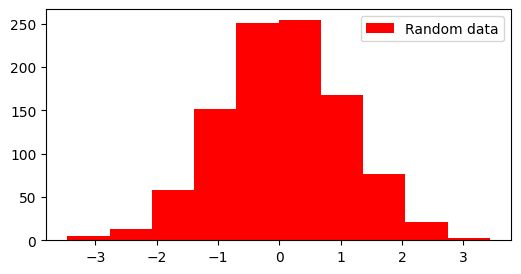

In [20]:
#2. 
fig = plt.figure(figsize=(6, 3))

date = np.random.randn(1000)

plt.hist(date, histtype='stepfilled', color='r', label="Random data")
plt.legend()

3. Tracer un diagramme à barres à partir des données suivantes : 
categories = ['A', 'B', 'C', 'D', 'E'], valeurs = [25, 30, 15, 20, 10]

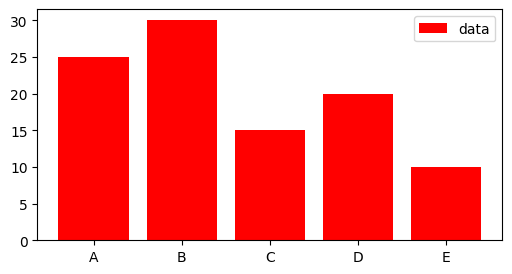

In [21]:
#3.
categories = ['A', 'B', 'C', 'D', 'E']
valeurs = [25, 30, 15, 20, 10]

fig = plt.figure(figsize=(6, 3))
plt.bar(categories, valeurs, color="r", label="data")
plt.legend()

4. Tracer un nuage de points à partir de données aléatoires générées par NumPy.

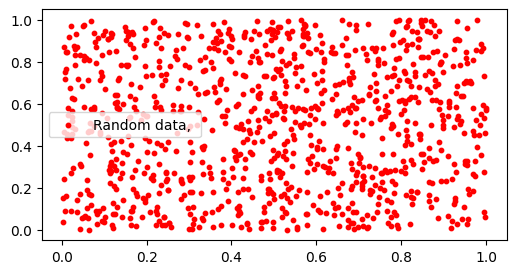

In [22]:
#4.
x = np.random.random(1000)
y = np.random.random(x.shape[0])

fig = plt.figure(figsize=(6, 3))

plt.scatter(x, y, color='r', s=10, label="Random data, ")
plt.legend()

5. Tracer une courbe sinusoïdale en utilisant NumPy.

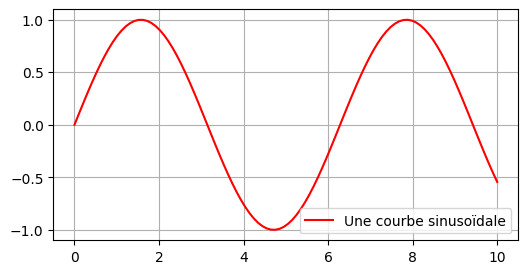

In [23]:
# 5.
x = np.linspace(0, 10, 100)
y = np.sin(x)

fig = plt.figure(figsize=(6, 3))

plt.plot(x, y, color='r', label="Une courbe sinusoïdale")
plt.grid()
plt.legend()

6. Tracer deux courbes sur le même graphe à partir des données suivantes :
x = np.linspace(0, 10, 100)
y1 = np.sin(x)
y2 = np.cos(x)

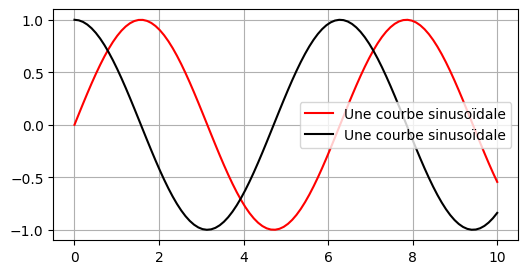

In [24]:
# 6.
x = np.linspace(0, 10, 100)
y1 = np.sin(x)
y2 = np.cos(x)

fig = plt.figure(figsize=(6, 3))

plt.plot(x, y1, color='r', label="Une courbe sinusoïdale")
plt.plot(x, y2, color='black', label="Une courbe sinusoïdale")
plt.grid()
plt.legend()

7. Tracer un diagramme en secteurs (camembert) à partir des données suivantes :
categories = ['A', 'B', 'C', 'D'], valeurs = [30, 25, 15, 20]


([<matplotlib.patches.Wedge at 0x2105d661090>,
 [Text(0.6999999646685039, 1.2124355856968623, 'A'),
  Text(-1.083288597215751, 0.19101260466872458, 'B'),
  Text(-0.3762215803360437, -1.0336620929924103, 'C'),
  Text(0.84264944686234, -0.7070657039502006, 'D')])

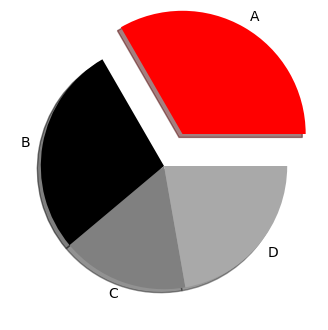

In [25]:
# 7.
categories = ['A', 'B', 'C', 'D']
valeurs = [30, 25, 15, 20]
colors = ['red', 'black', 'grey', 'darkgrey'] 
explode = (0.3, 0, 0, 0)  # немного выдвинуть второй сектор

fig = plt.figure(figsize=(4, 4))

plt.pie(valeurs, colors=colors, explode=explode, labels=categories, shadow=True,)


8. Tracer une courbe polynomiale à partir des données suivantes :
x = np.linspace(-5, 5, 100)
y = 3 * x**3 + 2 * x**2 - 8 * x + 5

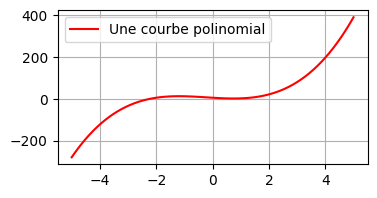

In [26]:
#8.
x = np.linspace(-5, 5, 100)
y = 3 * x**3 + 2 * x**2 - 8 * x + 5

fig = plt.figure(figsize=(4, 2))
plt.plot(x, y, color='r', label="Une courbe polinomial")
plt.grid()
plt.legend()

9. Tracer un diagramme en barres empilées à partir des données suivantes :
categories = ['A', 'B', 'C', 'D']
valeurs1 = [10, 15, 20, 25], valeurs2 = [5, 10, 15, 20]

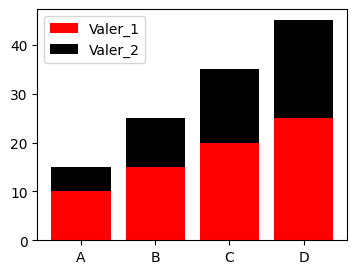

In [27]:
# 9.
categories = ['A', 'B', 'C', 'D']
valeurs1 = [10, 15, 20, 25]
valeurs2 = [5, 10, 15, 20]

fig = plt.figure(figsize=(4, 3))
plt.bar(categories, valeurs1, color='r', label="Valer_1")
plt.bar(categories, valeurs2, bottom=valeurs1, color='black', label="Valer_2")
plt.legend()


10. Tracer un graphique en boîte (boxplot) à partir des données suivantes :
data = [np.random.normal(0, 1, 100), np.random.normal(2, 1, 100), np.random.normal(-3, 2, 100)]

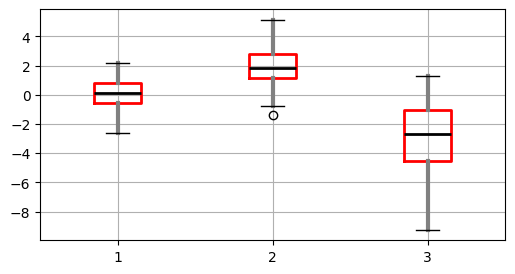

In [28]:
# 10.
data = [np.random.normal(0, 1, 100),
         np.random.normal(2, 1, 100),
         np.random.normal(-3, 2, 100)
         ]

fig = plt.figure(figsize=(6, 3))
plt.boxplot(
            data,
            boxprops=dict(color='r', linewidth=2),
            medianprops=dict(color='black', linewidth=2),
            whiskerprops=dict(color='gray', linewidth=3),
            )
plt.grid()

 # <span style=color:red>Le Pendu</span>
---
Objectifs pédagogiques :
- Manipulation de chaînes de caractères
- Utilisation de listes et de dictionnaires
- Conditions et boucles (boucles for et while, conditions if, elif, else)
- Fonctions
- Gestion des entrées utilisateur
- Affichage de résultats à l'écran


1. Choix d'un mot :

- Créer une liste de mots. 
- Utiliser la fonction random.choice pour sélectionner un mot aléatoire.
- Créer une variable pour stocker le mot masqué (initialement, une chaîne de caractères composée de tirets “_” de la même longueur que le mot).


In [29]:
list_de_mot = ["python", "ordinateur", "voiture", "maison", "pendu"]
N_tent = 8

mot = random.choice(list_de_mot)
mot_masq = "_" * len(mot)
mot_masq

'_______'

2. Boucle de jeu :

- Tant que le joueur n'a pas trouvé le mot et qu'il lui reste des tentatives :
    - Afficher le mot masqué et le nombre de tentatives restantes.
      - avec des étoiles ou des underscores. “le pen**” ou “le pen__”
    - Demander au joueur de deviner une lettre.
    - Vérifier si la lettre est dans le mot :
      - Si oui, mettre à jour le mot masqué en remplaçant les tirets correspondants.
      - Si non, décrémenter le nombre de tentatives et afficher une partie du pendu.


In [30]:
# function pour dessiner le pendu
def afficher_pendu(nb_tentat):
    """
    Affiche le pendu en fonction du nombre d'erreurs.
    """


    plt.figure()  # Crée une nouvelle figure


    # Dessine la potence
    plt.plot([0, 1], [0, 0], 'k')  # Base
    
    if nb_tentat < 8:
        plt.plot([0.5, 0.5], [0, 1], 'k')  # Poteau vertical
        plt.plot([0.5, 1], [1, 1], 'k')  # Barre horizontale
        plt.plot([1, 1], [0.9, 0.8], 'k')  # Corde


    # Dessine le corps du pendu en fonction du nombre d'erreurs
    if nb_tentat < 7:# Tête
        head = plt.Circle((1, 0.75), 0.05, fill=False, color='k', linewidth=2)
        plt.gca().add_patch(head)
    if nb_tentat < 6:# Corps
        corp = plt.Circle((1, 0.55), 0.1, fill=False, color='k', linewidth=2)
        plt.gca().add_patch(corp)
    if nb_tentat < 5:# Bras gauche
        plt.plot([0.9, 0.83], [0.65, 0.6], 'k')
    if nb_tentat < 4:# Bras droit
        plt.plot([1.1, 1.17], [0.65, 0.60], 'k')
    if nb_tentat < 3:# Jambe gauche
        plt.plot([0.9, 0.83], [0.45, 0.3], 'k')
    if nb_tentat < 2:# Jambe droite
        plt.plot([1.1, 1.17], [0.45, 0.3], 'k')
    if nb_tentat < 1:# Croix
        plt.plot([0.65, 1.35], [0.2, 0.9], 'k')
        plt.plot([0.65, 1.35], [0.9, 0.2], 'k')
    
    # Paramètres d'affichage
    plt.axis('off')  # Cache les axes
    plt.xlim(-0.2, 1.4)  # Ajuste les limites de l'axe x
    plt.ylim(-0.2, 1.2)  # Ajuste les limites de l'axe y
    plt.show()  # Affiche le pendu


voiture 
 Vous avez 2 tentatives restantes 


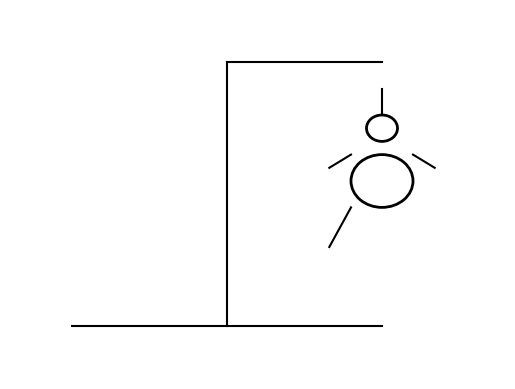

In [31]:
# print(mot) si voui voule tester
print(mot_masq, "\n", f"Vous avez {N_tent} tentatives restantes ")
afficher_pendu(N_tent)
while N_tent and (mot_masq != mot):
    lettre = input("Devinez une lettre")
    
    if lettre.lower() in mot.lower():
        mot_masq =  "".join([
            mot[i] if mot[i].lower() == lettre else mot_masq[i]
            for i in range(len(mot))
            ])
        clear_output(wait=True)
        print(mot_masq, "\n", f"Vous avez {N_tent} tentatives restantes ")
        afficher_pendu(N_tent)
        
    else:
        N_tent -= 1
        clear_output(wait=True)
        print(mot_masq, "\n", f"Vous avez {N_tent} tentatives restantes ")
        afficher_pendu(N_tent)



### <span style=color:red>Pierre-feuille-ciseaux</span>
Jeu simple contre l'ordinateur.

Utilise des variables, des entrées utilisateur, la fonction random.choice pour le choix de l'ordinateur, et des instructions conditionnelles pour déterminer le gagnant.

In [32]:
dict_regle_pour_gagner = {
    "pierre":"ciseaux",
     "ciseaux":"feuille",
     "feuille":"pierre"
     }
score = 0
point_pour_gagner = 3

print("Pierre-feuille-ciseaux! Choisissez!")

# boucle de jeu
while abs(score) < point_pour_gagner:

    player = str(input("Choisissez pierre, ciseaux ou feuille : p, c, f"))
    if player not in "pcf":
        print("Erreur de choix")
        continue

    clear_output(wait=True)
    print(f"Votre score est: {score}")
    ordi = random.choice(list(dict_regle_pour_gagner.keys()))
    print(f"player: {player},  ordi: {ordi[0]}")
    if player == ordi[0]:
        print("Choisissez encore une fois pierre, ciseaux ou feuille : p, c, f")
        continue
    
    if dict_regle_pour_gagner.get(ordi)[0] == player:
        score -= 1
        print(" :( ")
    else:
        score +=1
        print(" :) ")

# print le resultat
clear_output(wait=True)
if score > 0:
    print(f"Votre score est: {score}. Vous gagnez!")
else:
    print(f"Votre score est: {score}. Désolé")
    

Votre score est: -3. Désolé


### <span style=color:red>Mini-jeu de devinettes</span>
L'ordinateur choisit un nombre aléatoire entre 1 et 100.
L'utilisateur doit deviner le nombre en un nombre limité de tentatives.
L'ordinateur donne des indices (plus grands, plus petits) à chaque tentative.


In [33]:
# constant 
list_de_nomb = list(range(1, 101))
ordi_choix = random.choice(list_de_nomb)
N_tent = 10

print(" On va jouer!")

# bouclede jeu
for i in range(N_tent):
    print(f"Vous avez {N_tent} tentatives restantes. Choisissez votre nombre:", end=" ")
    player_n = int(input("Print le nombre"))
    print(player_n)
    
    if player_n == ordi_choix:
        print("Vous gegnez!")
        break
    elif player_n < ordi_choix:
        N_tent -= 1
        print("Plus")
    else:
        N_tent -= 1
        print("Moins")

if N_tent == 0: print("Désolé :( ")
    
    


 On va jouer!
Vous avez 10 tentatives restantes. Choisissez votre nombre: 50
Plus
Vous avez 9 tentatives restantes. Choisissez votre nombre: 75
Plus
Vous avez 8 tentatives restantes. Choisissez votre nombre: 84
Moins
Vous avez 7 tentatives restantes. Choisissez votre nombre: 80
Moins
Vous avez 6 tentatives restantes. Choisissez votre nombre: 78
Moins
Vous avez 5 tentatives restantes. Choisissez votre nombre: 76
Plus
Vous avez 4 tentatives restantes. Choisissez votre nombre: 77
Vous gegnez!


# <span style=color:red>Création d'un jeu de Morpion</span>
---
Objectif :
Développer un jeu de Morpion en Python où deux joueurs peuvent s'affronter.
Utiliser NumPy pour représenter la grille de jeu et gérer les coups des joueurs.
Utiliser Matplotlib (Pyplot) pour afficher la grille et les marques (X et O)


### Fonctionnalités clés :
- Affichage de la grille :
  - Afficher une grille 3x3 représentant le plateau de jeu.
  - Utiliser Pyplot pour dessiner les lignes de la grille.
- Gestion des tours de jeu :
    - Alterner les tours entre les deux joueurs.
    - Demander au joueur courant de saisir les coordonnées de la case où il souhaite placer sa marque.
    - Vérifier si la case est valide (vide et dans les limites de la grille).
    - Placer la marque du joueur sur la grille (en utilisant NumPy pour mettre à jour la représentation interne de la grille).
    - Mettre à jour l'affichage de la grille avec la nouvelle marque.
- Détection de match nul :
    - Si toutes les cases sont remplies et qu'aucun joueur n'a gagné, afficher un message de match nul et terminer la partie.




In [34]:
def afficher_grille(jeu_array:np.ndarray):
    """
    Affiche la gride, ajoute les marks
    """

    fig, ax = plt.subplots(figsize=(2,2))  # Crée une nouvelle figure

    # Dessine la grid
    plt.plot([0, 3], [1, 1], 'k') 
    plt.plot([0, 3], [2, 2], 'k')  # Poteau vertical
    plt.plot([1, 1], [0, 3], 'k')  # Barre horizontale
    plt.plot([2, 2], [0, 3], 'k')  # Corde

    # Dessine les marks
    mask1 = (jeu_array > 0)
    mask2 = (jeu_array < 0)

    for i in range(3):
        for j in range(3):
            if mask1[i, j]:
                circle = plt.Circle((i + 0.5, j + 0.5), 0.2, fill=False, color='r', linewidth=2)
                plt.gca().add_patch(circle)
            if mask2[i, j]:
                plt.text(i + 0.5, j + 0.5, "X", color='b', fontsize=16, ha='center', va='center')
             
    # Paramètres d'affichage
    plt.xlabel("Axe X")
    plt.ylabel("Axe Y")
    plt.xticks([0.5, 1.5, 2.5], ['1', '2', '3'])  # position et labels
    plt.yticks([0.5, 1.5, 2.5], ['1', '2', '3'])
    plt.axis()  
    plt.xlim(-0.2, 3.2)  # Ajuste les limites de l'axe x
    plt.ylim(-0.2, 3.2)  # Ajuste les limites de l'axe y
    # plt.show()  # Affiche le pendu

def recuperer_coordonnees(joueur:str, arr:np.ndarray)->tuple:
    '''recuperer_coordonnees():
    Demande au joueur de saisir les coordonnées de la case (ligne, colonne).
    Gère les erreurs de saisie (coordonnées invalides, case déjà occupée).
    Retourne les coordonnées valides sous forme d'un tuple (ligne, colonne).
    '''

    while True:
        try:
            print(f"Joueur {joueur}, votre tour. Entrez les coordonnées 'X Y' entre 1 et 3 :")
            x_str, y_str = input().split()
            x, y = int(x_str), int(y_str)
            
            if 1 <= x <= 3 and 1 <= y <= 3:
                if arr[x - 1, y - 1] == 0:
                    return x, y
                else:
                    print("Le place est ocupeé. Réessayez.")
            else:
                print("Les coordonnées doivent être entre 1 et 3. Réessayez.")
        except ValueError:
            print("Entrée invalide. Veuillez entrer deux nombres séparés par un espace.")

def verifier_victoire(arr:np.ndarray)->dict:
    """
    Verifie le result
    """
    
    list_cond = [*np.sum(arr, axis=0), *np.sum(arr, axis=1)]  # Calcule le sum de ligne
    list_cond.append(arr[0, 0] + arr[1, 1] + arr[2, 2])  
    list_cond.append(arr[2, 0] + arr[1, 1] + arr[0, 2])
    
    result = dict()
    
    for i, v in enumerate(list_cond):
        if v == 3:
            result["joueur"] = "r"
            result["position"] = i
        elif v == -3:
            result["joueur"] = "b"
            result["position"] = i

    return result

def afficher_result(res_dict:dict, arr):
    """
    Affiche le result
    """

    pos = res_dict["position"]
    col = res_dict["joueur"]    # 'r', 'b', etc
    
    afficher_grille(arr)
    if 3 <= res_dict["position"] < 6:
        plt.plot([res_dict["position"] - 2.5, res_dict["position"] - 2.5], [0.5, 2.5], color=col) 
    elif res_dict["position"] < 3:
        plt.plot([0.5, 2.5], [res_dict["position"] + 0.5, res_dict["position"] + 0.5], color=col) 
    elif res_dict["position"] == 6:
        plt.plot([0.5, 2.5], [0.5 , 2.5], color=col)
    else:
        plt.plot([0.5, 2.5], [2.5 , 0.5], color=col)
    
    plt.show()



Congradulation!


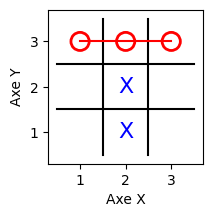

In [35]:
# la boucle de jeu

jeu_array = np.zeros(9).reshape((3, 3)) # creer le tableau
joueur = ["r", "b"]

for n_coup in range(9):
    j = joueur[n_coup % 2]
    
    x, y = recuperer_coordonnees(j, jeu_array)

    jeu_array[x -1, y -1] = 1 if j == "r" else -1
    clear_output(wait=True)
    print(f"Joueur {j}:   x: {x},   y: {y}.")
    afficher_grille(jeu_array)
    plt.show()

    if verifier_victoire(jeu_array):
        clear_output(wait=True)
        print("Congradulation!")
        afficher_result(verifier_victoire(jeu_array), jeu_array)
        plt.show()
        break

    if n_coup == 8:
        print("Egalité")
        break



# <span style=color:red>Pytest</span>
---
- Dans votre environnement virtuelpip freeze
`pip install pytest`
- Créer un dossier test ou tests dans lequel vous mettez des fichiers de tests:
    - un module est testé par un ou plusieur fichier de test
    - dans un fichier un fonction commençant par test_ testera une fonction de votre programme
- Utilisez la commande suivante pour exécuter les tests:
  - `pytest votre_dossier_de_test/ `
  - `pytest votre_dossier_de_test/votre_fichier_test.py`


# <span style=color:red>Pandas</span>
---
### <span style="color:red">Exercices</span>
- Exercice 1 - Chargement de données :

    - Téléchargez le fichier CSV "titanic.csv" à partir du lien suivant : 
  [CSV](https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv)
    - Utilisez Pandas pour charger ce fichier dans un DataFrame nommé "titanic_df".
    - Affichez les 5 premières lignes du DataFrame pour inspecter les données.


In [36]:
path_csv = r'D:\Programmation\Formation\Simplon\data\titanic.csv.txt'
titanic_df = pd.read_csv(path_csv)
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


- <span style="color:red">Exercice 2</span> - Exploration des données :
    - Trouvez le nombre total de passagers dans le Titanic.
    - Déterminez le pourcentage de passagers qui ont survécu.


In [37]:
n_total = titanic_df.shape[0]
n_survecu = np.round(titanic_df['Survived'].sum() / n_total, 3)

print(f'le nombre total de passagers dans le Titanic: {n_total}')
print(f'le pourcentage de passagers qui ont survécu: {n_survecu * 100}%.')

le nombre total de passagers dans le Titanic: 891
le pourcentage de passagers qui ont survécu: 38.4%.


- <span style="color:red">Exercice 3</span> - Analyse des âges :
    - Calculez l'âge moyen des passagers.
    - Trouvez l'âge le plus fréquent des passagers.


In [38]:
age_moyen = np.round(titanic_df['Age'].mean(), 2)
print(f'Age moyen: {age_moyen}')

age_freq = titanic_df['Age'].value_counts()
print(f'Age le plus fréquent: {age_freq.iloc[0]}')

Age moyen: 29.7
Age le plus fréquent: 30


- <span style="color:red">Exercice 4</span> - Filtrage des données :
    - Créez un nouveau DataFrame "survived_df" contenant uniquement les passagers qui ont survécu.
    - Créez un nouveau DataFrame "non_survived_df" contenant uniquement les passagers qui n'ont pas survécu.


In [39]:
mask = titanic_df['Survived'] > 0

survived_df = titanic_df[mask]
non_survived_df = titanic_df[~mask]

- <span style=color:red>Exercice 5</span> - Statistiques des tarifs :
    - Trouvez le tarif minimum, maximum, moyen et médian payé par les passagers.


In [40]:
stat_fare = titanic_df['Fare'].describe()
stat_fare

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [41]:
stat_fare = titanic_df['Fare'].describe()
print(f"le tarif minimum:{titanic_df['Fare'].min()}")
print(f"le tarif maximum: {titanic_df['Fare'].max()}")
print(f"le tarif moyen: {titanic_df['Fare'].mean()}")
print(f"le tarif médian: {titanic_df['Fare'].median()}")

le tarif minimum:0.0
le tarif maximum: 512.3292
le tarif moyen: 32.204207968574636
le tarif médian: 14.4542


- <span style=color:red>Exercice 6</span> - Traitement des valeurs manquantes :
    - Téléchargez le fichier CSV "sales_data.csv" à partir du lien suivant :  [CSV](https://github.com/ine-rmotr-curriculum/FreeCodeCamp-Pandas-Real-Life-Example/blob/master/data/sales_data.csv)

    - Chargez le fichier dans un DataFrame nommé "sales_df".
    - Affichez le nombre de valeurs manquantes dans chaque colonne du DataFrame.


In [42]:
path_csv_sales = r"D:\Programmation\Formation\Simplon\data\sales_data.csv"
sales_df = pd.read_csv(path_csv_sales)
print(sales_df.isnull().sum(axis=0))


Date                0
Day                 0
Month               0
Year                0
Customer_Age        0
Age_Group           0
Customer_Gender     0
Country             0
State               0
Product_Category    0
Sub_Category        0
Product             0
Order_Quantity      0
Unit_Cost           0
Unit_Price          0
Profit              0
Cost                0
Revenue             0
dtype: int64


- <span style=color:red>Exercice 7</span> - Suppression des doublons :
    - Téléchargez le fichier CSV "GlobalLandTemperaturesByMajorCity.csv" à partir du lien suivant : https://www.kaggle.com/datasets/berkeleyearth/climate-change-earth-surface-temperature-data?select=GlobalLandTemperaturesByMajorCity.csv
    - Chargez le fichier dans un DataFrame nommé "duplicate_df".
    - Supprimez les lignes en double du DataFrame.
    - Afficher la taille des Dataframes avant et après


In [43]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("berkeleyearth/climate-change-earth-surface-temperature-data")

print("Path to dataset files:", path)

d:\Programmation\Formation\Simplon\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\Hanna\.cache\kagglehub\datasets\berkeleyearth\climate-change-earth-surface-temperature-data\versions\2


In [44]:
csv_file_climat = os.path.join(path, "GlobalLandTemperaturesByMajorCity.csv")
climat_df = pd.read_csv(csv_file_climat)
climat_df.head(3)

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W


In [45]:
climat_df_sans_dupl = climat_df.drop_duplicates()
print(f"Avec duplicate: {climat_df.shape}, sans duplicate: {climat_df_sans_dupl.shape}")

Avec duplicate: (239177, 7), sans duplicate: (239177, 7)


- <span style=color:red>Exercice 8</span> - Remplacement des valeurs incorrectes :
  - Chargez le fichier dans un DataFrame nommé "temperature_df".  
  - Remplacez les valeurs négatives dans la colonne "AverageTemperature" par la valeur absolue de ces valeurs.
  - Afficher le minimum avant et après


In [46]:
temperature_df = climat_df_sans_dupl["AverageTemperature"]
mask_temp = climat_df_sans_dupl["AverageTemperature"] < 0
temperature_df_below_zero = np.abs(temperature_df)

print(f"Le minimum de temperature avant: {temperature_df.min()}, Le minimum de temperature aupres: {temperature_df_below_zero.min()}")

Le minimum de temperature avant: -26.772, Le minimum de temperature aupres: 0.0


- <span style=color:red>Exercice 9</span> - Extraction de données :
    - Téléchargez le fichier CSV "email_jetable.csv" à partir du lien suivant : https://sql.sh/ressources/sql-email-jetable/email_jetable.csv
    - Chargez le fichier dans un DataFrame nommé "emails_df".
    - Donnez un nom aux colonnes: [index, emails]
    - Créez une nouvelle colonne "extension" contenant uniquement l’extension du domaines des adresses e-mail (com, fr etc…).
    - Affichez les valeurs unique de la colonne “extension”


In [47]:
file_name = "email_jetable.csv"
path_email_jetable = os.path.join("data", file_name)

email_df = pd.read_csv(path_email_jetable)
email_df.columns = ["index", "emails"]

email_df["extension"] = email_df["emails"].apply(lambda x: x.split(".")[-1])
email_df["extension"].unique()

array(['com', 'net', 'org', 'to', 'de', 'cx', 'info', 'nf', 'in', 'it',
       'br', 'tk', 'uk', 'biz', 'eu', 'cc', 'by', 'lv', 'dj', 'nu', 'id',
       'ws', 'tc', 'us', 'at', 'me', 'gravel', 'la', 'ru', 'fr'],
      dtype=object)

- <span style=color:red>Exercice 10</span> - Transformation de données :
    - Téléchargez le fichier CSV "student_grades.csv" à partir du lien suivant : https://github.com/DeVerMyst/DEVIA2023/blob/master/data/student_grades.csv
    - Chargez le fichier dans un DataFrame nommé "grades_df".
    - Donnez un nom aux colonnes: ['ID','salle','note']
    - Ajoutez une colonne “note_dec” qui contient les notes de 0 à 17 (E- à A+)
    - Convertissez les notes pour qu’elles soient entre 0 et 20 en appliquant une fonction
    - Ajoutez une colonne "result" qui contiendra "Réussite" pour les étudiants ayant une note supérieure ou égale à 10, sinon "Échec".


In [48]:
from itertools import product

file_name = "student_grades.csv"
path_student_grades = os.path.join("data", file_name)

grades_df = pd.read_csv(path_student_grades)
grades_df.columns = ['ID','salle','note']

list1 = ["A", "B", "C", "D", "E", "F"]
list2 = ["+", "", "-"]

note_list = ["".join(i) for i in product(list1, list2)]
zip_note = dict(zip(note_list[::-1], range(len(note_list))))
grades_df["note_dec"] = grades_df["note"].apply(lambda x: zip_note.get(x))

grades_df["reusit"] = (20/17) * grades_df["note_dec"] >= 10
grades_df["reusit"] = grades_df["reusit"].map({True: "Reussit", False: "Echec"})

grades_df

,ID,salle,note,note_dec,reusit
0,401767594,3,B-,12,Reussit
1,678665086,4,A+,17,Reussit
2,678665086,3,A+,17,Reussit
3,553725811,2,C,10,Reussit
4,678665086,1,B,13,Reussit
5,886308195,1,A,16,Reussit
6,103066521,2,C,10,Reussit
7,103066521,3,C-,9,Reussit
8,821568627,4,D,7,Echec
9,821568627,2,A+,17,Reussit


# <span style=color:red>Seaborn</span>

### <span style=color:red>Exercice 1 - Visualisation des notes des étudiants :</span>
-  Chargez le fichier "student_grades.csv" dans un DataFrame nommé "grades_df".
-  Utilisez Seaborn pour créer un histogramme représentant la distribution des notes des étudiants.


In [101]:
sns.set_theme(style="whitegrid")

# Палитра: чёрный, красный
sns.set_palette(["red", "black", "gray"])

          ID  salle note  note_dec   reusit
0  401767594      3   B-        12  Reussit
1  678665086      4   A+        17  Reussit
2  678665086      3   A+        17  Reussit


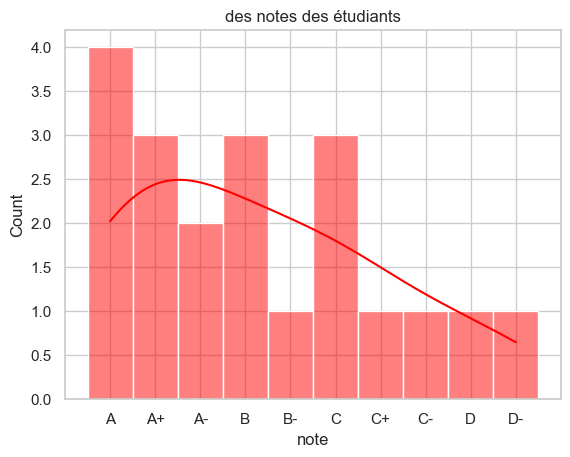

In [189]:
file_name = "student_grades.csv"
path_student_grades = os.path.join("data", file_name)
print(grades_df.head(3))
sns.histplot(grades_df["note"].sort_values(), kde=True)

plt.title("des notes des étudiants")

plt.show()

### <span style=color:red>Exercice 2 - Comparaison des notes en fonction des salles :</span>
-  Utilisez le DataFrame "grades_df" pour créer un graphique à barres montrant la moyenne des notes des étudiants pour chaque salle.


Text(0.5, 1.0, 'la moyenne des notes des étudiants pour chaque salle')

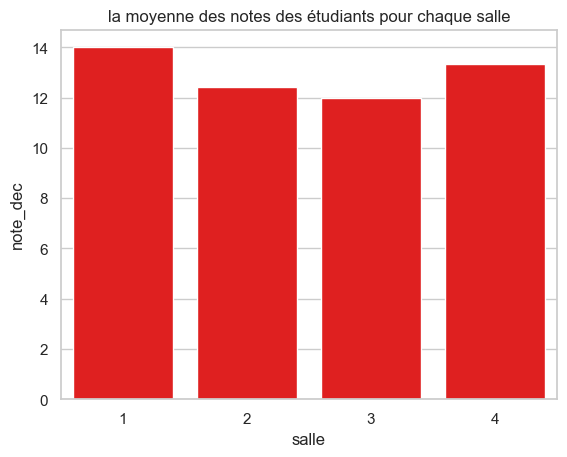

In [103]:
mean_salle = grades_df.groupby("salle")["note_dec"].mean()
sns.barplot(mean_salle)

plt.title("la moyenne des notes des étudiants pour chaque salle")

### <span style=color:red>Exercice 3 - Comparaison des notes en fonction du statut de réussite :</span>
- Utilisez le DataFrame "grades_df" pour créer un graphique à barres montrant le nombre d'étudiants ayant réussi et échoué.


Text(0.5, 1.0, " le nombre d'étudiants ayant réussi et échoué")

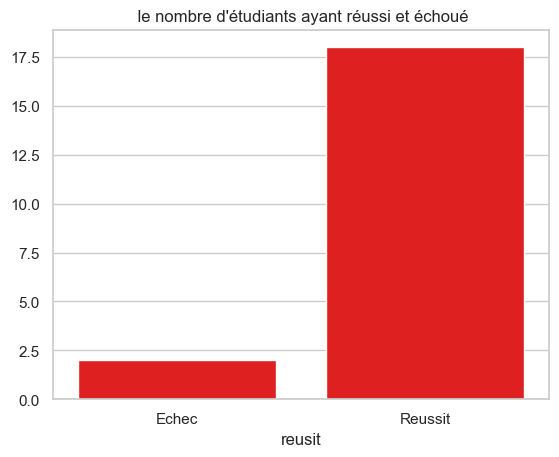

In [104]:
n_reussi = grades_df.groupby("reusit").size()
sns.barplot(n_reussi)

plt.title(" le nombre d'étudiants ayant réussi et échoué")

Exercice 4 - Visualisation de la corrélation entre les variables :
- Chargez le fichier "titanic.csv" dans un DataFrame nommé "titanic_df".
- Utilisez Seaborn pour créer une matrice de corrélation pour les variables numériques du DataFrame "titanic_df".


In [159]:
path_csv = r'D:\Programmation\Formation\Simplon\data\titanic.csv.txt'
titanic_df = pd.read_csv(path_csv)
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


<Axes: >

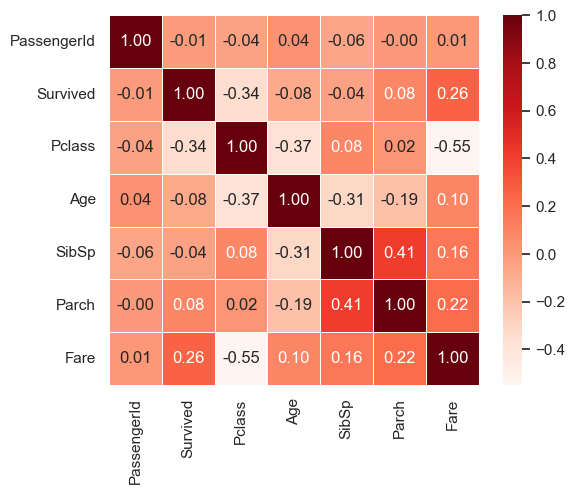

In [ ]:
col_numeric = ["PassengerId", "Survived", "Pclass", "Age", "SibSp",	"Parch", "Fare"]

sns.heatmap(titanic_df[col_numeric].corr(),
            annot=True,
            fmt=".2f", 
            cmap="Reds",         # красная палитра
            square=True,         # делать клетки квадратными
            linewidths=0.5,      # линии между клетками
            cbar=True            # цветовая шкала
            )

### <span style=color:red> Exercice 5 - Comparaison des tarifs en fonction du statut de survie :</span>
- Utilisez le DataFrame "titanic_df" pour créer un graphique en boîte (boxplot) montrant la distribution des tarifs payés par les passagers en fonction de leur statut de survie (survit ou non).


Exercice 18 - Visualisation des tarifs des passagers en fonction du statut de survie :
Utilisez le DataFrame "titanic_df" pour créer un graphique en boîte montrant la distribution des tarifs payés par les passagers en fonction de leur statut de survie (survécu ou non).


Text(0.5, 1.0, 'Distribution du tarif (Fare) selon la survie')

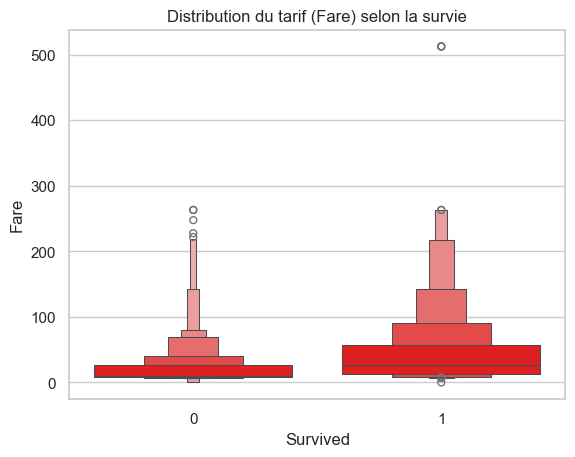

In [229]:
sns.boxenplot(data=titanic_df, x="Survived", y="Fare")


plt.title('Distribution du tarif (Fare) selon la survie')

### <span style=color:red>Exercice 6 - Visualisation des âges des passagers :</span>
- Utilisez le DataFrame "titanic_df" pour créer un histogramme représentant la distribution des âges des passagers.


Exercice 20 - Visualisation de la répartition des âges des passagers :
Utilisez le DataFrame "titanic_df" pour créer un histogramme représentant la répartition des âges des passagers.


<Axes: xlabel='Age', ylabel='Count'>

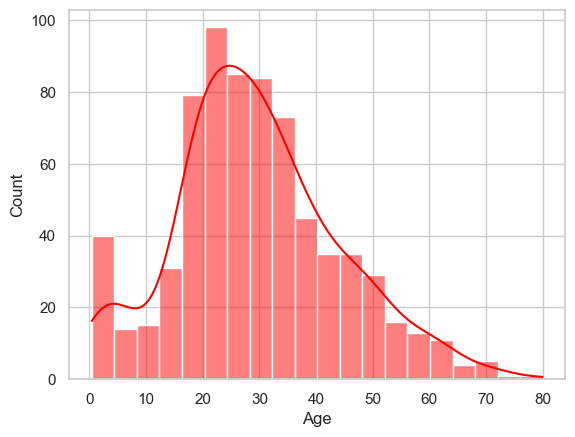

In [226]:
sns.histplot(data=titanic_df, x="Age", kde=True)

### Exercice 19 - Comparaison des âges des passagers en fonction du port d'embarquement 
Utilisez le DataFrame "titanic_df" pour créer un graphique en boîte montrant la distribution des âges des passagers en fonction du port d'embarquement.


<Axes: xlabel='Embarked', ylabel='Age'>

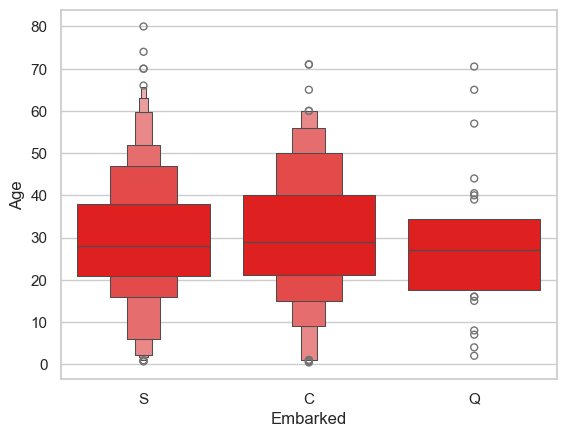

In [219]:
sns.boxenplot(data=titanic_df, x="Embarked", y="Age")

### <span style=color:red>Exercice 7 - Comparaison des âges en fonction du statut de survie :</span>
- Utilisez le DataFrame "titanic_df" pour créer un graphique en boîte montrant la distribution des âges des passagers en fonction de leur statut de survie.


Text(0.5, 1.0, 'Distribution des age selon la survie')

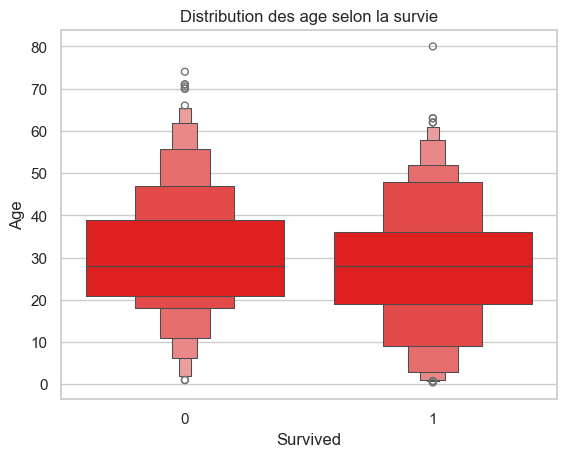

In [221]:
sns.boxenplot(data=titanic_df, x="Survived", y="Age")


plt.title('Distribution des age selon la survie')

### Exercice 8 - Visualisation de la répartition des tarifs :
- Utilisez le DataFrame "titanic_df" pour créer un histogramme représentant la répartition des tarifs payés par les passagers.


### Exercice 16 - Visualisation de la répartition des tarifs des passagers :
Utilisez le DataFrame "titanic_df" pour créer un histogramme représentant la répartition des tarifs payés par les passagers.


<Axes: xlabel='Fare', ylabel='Count'>

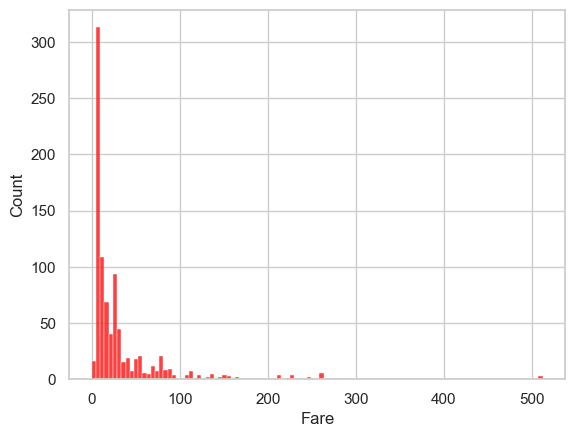

In [154]:
sns.histplot(data=titanic_df, x="Fare")

### Exercice 9 - Comparaison des tarifs en fonction de la classe :
- Utilisez le DataFrame "titanic_df" pour créer un graphique en boîte montrant la distribution des tarifs payés par les passagers en fonction de leur classe (1ère, 2ème ou 3ème classe).


<Axes: xlabel='Pclass', ylabel='Fare'>

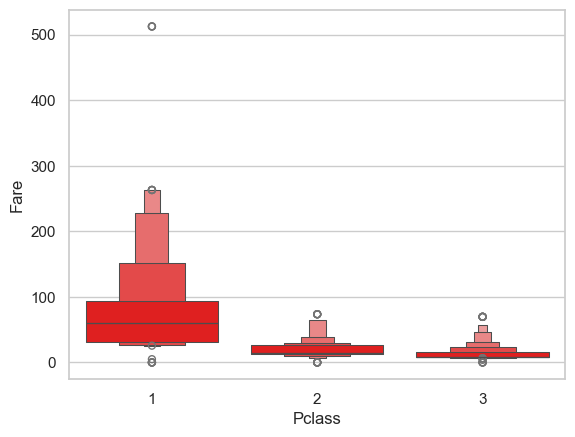

In [222]:
sns.boxenplot(data=titanic_df, x="Pclass", y="Fare")


### Exercice 14 - Visualisation des tarifs des passagers en fonction de la classe :
Utilisez le DataFrame "titanic_df" pour créer un graphique en boîte montrant la distribution des tarifs payés par les passagers en fonction de leur classe.


<Axes: xlabel='Fare', ylabel='Count'>

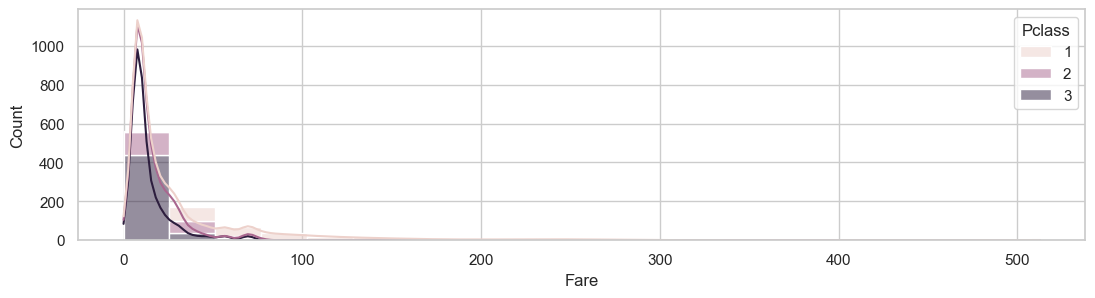

In [207]:
fig = plt.figure(figsize=(13, 3))
sns.histplot(
    data=titanic_df, 
    kde=True,
    x="Fare",          # переменная для гистограммы
    hue="Pclass",      # группировка по классу
    bins=20,           # количество корзин
    multiple="stack",  # варианты: "stack", "dodge", "fill"
)


### Exercice 10 - Visualisation de la répartition du genre des passagers
- Utilisation du DataFrame "titanic_df" pour créer un histogramme représentant la répartition des genres.


<Axes: xlabel='Sex', ylabel='Count'>

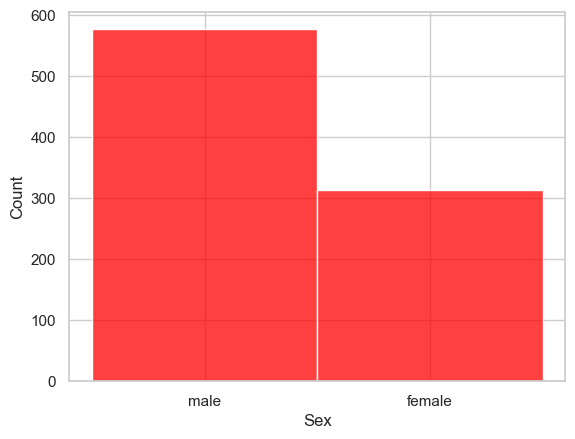

In [160]:
sns.histplot(data=titanic_df, x="Sex")

### Exercice 17 - Comparaison des tarifs des passagers en fonction du sexe :
Utilisez le DataFrame "titanic_df" pour créer un graphique en boîte montrant la distribution des tarifs payés par les passagers en fonction du sexe (homme ou femme).


<Axes: xlabel='Sex', ylabel='Fare'>

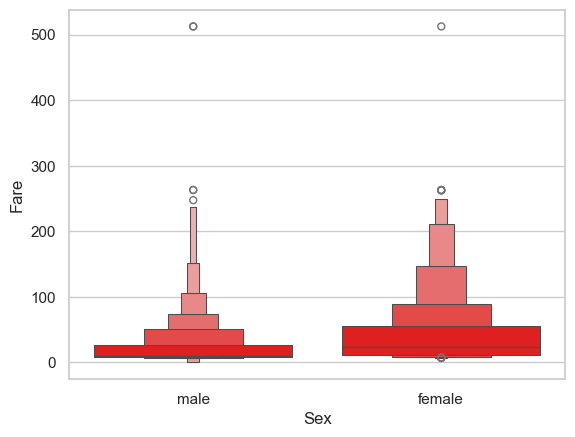

In [223]:
sns.boxenplot(data=titanic_df, y="Fare", x="Sex" )

### Exercice 15 - Comparaison des tarifs des passagers en fonction du port d'embarquement :
- Utilisez le DataFrame "titanic_df" pour créer un graphique en boîte montrant la distribution des tarifs payés par les passagers en fonction du port d'embarquement (C = Cherbourg, Q = Queenstown, S = Southampton).


Text(0.5, 1.0, 'la distribution des tarifs payés (C = Cherbourg, Q = Queenstown, S = Southampton)')

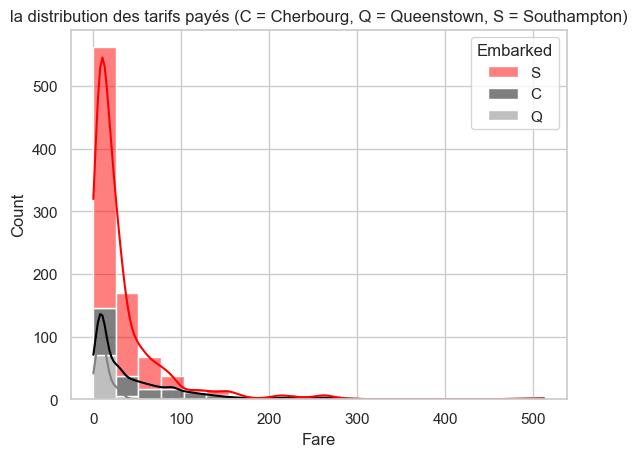

In [211]:
sns.histplot(
    data=titanic_df, 
    kde=True,
    x="Fare",          # переменная для гистограммы
    hue="Embarked",      # группировка по классу
    bins=20,           # количество корзин
    multiple="stack",  # варианты: "stack", "dodge", "fill"
)

plt.title("la distribution des tarifs payés (C = Cherbourg, Q = Queenstown, S = Southampton)")

<Axes: xlabel='Embarked', ylabel='Fare'>

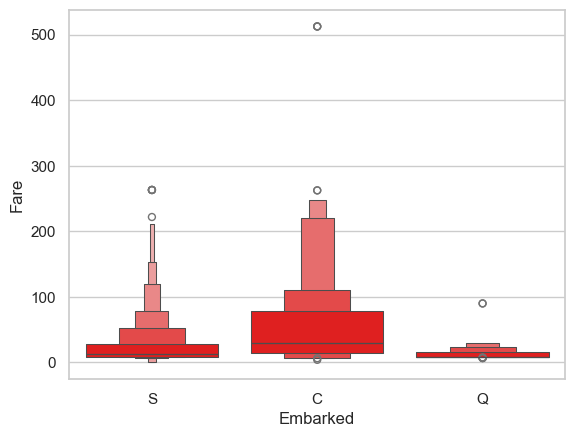

In [224]:
sns.boxenplot(data=titanic_df, x="Embarked", y="Fare")

### Exercice 11 sur le jeu de données "sales_data" :
Le jeu de données "sales_data.csv" contient des informations sur les ventes de produits dans un magasin. Chaque ligne représente une transaction avec les colonnes suivantes :
- `Date`: La date de la transaction.
- `Product`: Le nom du produit vendu.
- `Unit_Price`: Le prix unitaire du produit.
- `Order_Quantity`: Le nombre d'unités vendues.

Votre tâche est de réaliser les étapes suivantes :
- Chargez le fichier "sales_data.csv" dans un DataFrame nommé "sales_df".
- Affichez les 10 premières lignes du DataFrame pour visualiser les données.
- Calculez le chiffre d'affaires total réalisé sur l'ensemble des transactions.
- Tracez un graphique à barres montrant les 5 produits les plus vendus (en termes de quantité) avec le nom du produit sur l'axe des x et la quantité vendue sur l'axe des y.


In [167]:
path_csv_sales = r"D:\Programmation\Formation\Simplon\data\sales_data.csv"
sales_df = pd.read_csv(path_csv_sales)
sales_df.head(10)

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418
5,2016-05-15,15,May,2016,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,5,45,120,297,225,522
6,2014-05-22,22,May,2014,47,Adults (35-64),F,Australia,Victoria,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,199,180,379
7,2016-05-22,22,May,2016,47,Adults (35-64),F,Australia,Victoria,Accessories,Bike Racks,Hitch Rack - 4-Bike,2,45,120,100,90,190
8,2014-02-22,22,February,2014,35,Adults (35-64),M,Australia,Victoria,Accessories,Bike Racks,Hitch Rack - 4-Bike,22,45,120,1096,990,2086
9,2016-02-22,22,February,2016,35,Adults (35-64),M,Australia,Victoria,Accessories,Bike Racks,Hitch Rack - 4-Bike,21,45,120,1046,945,1991


le chiffre d'affaires total: 85271008


([0, 1, 2, 3, 4],
 [Text(0, 0, 'Water Bottle - 30 oz.'),
  Text(1, 0, 'Patch Kit/8 Patches'),
  Text(2, 0, 'Mountain Tire Tube'),
  Text(3, 0, 'AWC Logo Cap'),
  Text(4, 0, 'Sport-100 Helmet, Red')])

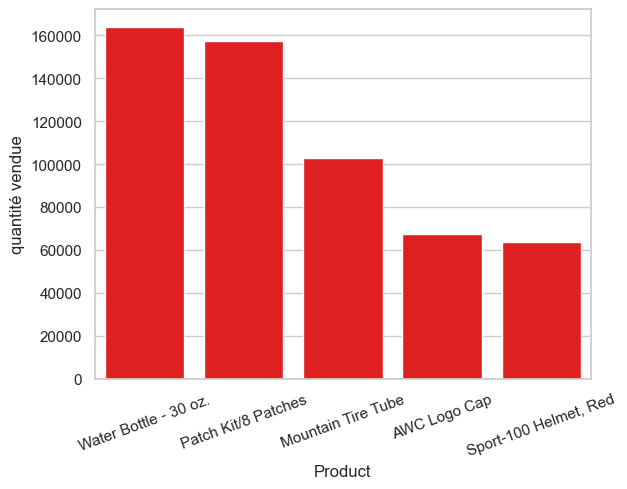

In [183]:
print(f"le chiffre d'affaires total: {sales_df['Revenue'].sum()}")
prod_quant_total = sales_df.groupby('Product')["Order_Quantity"].sum()
prod_quant_5 = prod_quant_total.sort_values(ascending=False)[:5]

sns.barplot(prod_quant_5)
plt.ylabel("quantité vendue")
plt.xticks(rotation=20)

### Exercice 12 - Visualisation de la répartition des notes des étudiants :
- Utilisez le DataFrame "grades_df" pour créer un histogramme représentant la répartition des notes des étudiants.



<Axes: xlabel='note', ylabel='Count'>

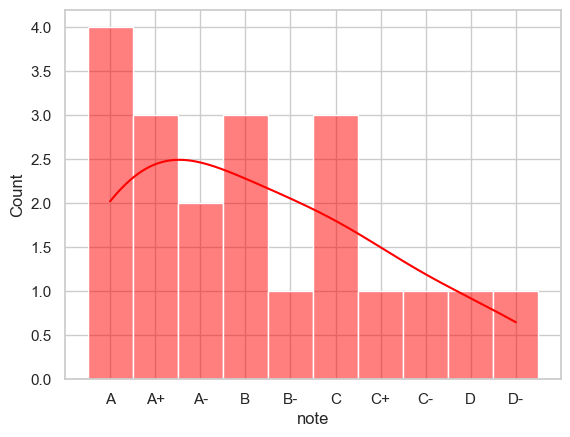

In [192]:
sns.histplot(data=grades_df["note"].sort_values(),  kde=True)


### Exercice 13 - Comparaison des notes des étudiants en fonction de la salle :
Utilisez le DataFrame "grades_df" pour créer un graphique en boîte montrant la distribution des notes des étudiants en fonction de la salle.


<Axes: xlabel='salle', ylabel='note_dec'>

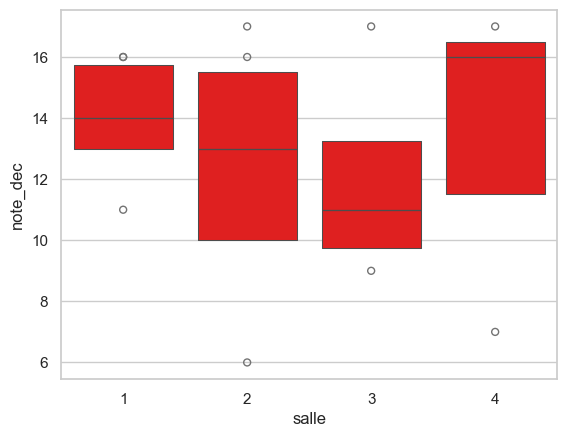

In [225]:
sns.boxenplot(data=grades_df, x="salle", y="note_dec")